In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 读取数据 read data


df = pd.read_csv("FH_mutations_6.csv", sep=",")
# Split the HGVSc_VEP column into multiple rows (keeping other columns unchanged)拆分HGVSc_VEP列为多行（其他列保持原值）
df["HGVSc_VEP"] = df["HGVSc_VEP"].str.split(";")
df = df.explode("HGVSc_VEP")

# 转换数值型字段Convert numerical fields
numeric_cols = ["REVEL_score", "BayesDel_noAF_score", "BayesDel_addAF_score"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# 清洗缺失值Clean missing values
df_clean = df.dropna(subset=numeric_cols)
print(f"有效数据量effective data: {len(df_clean)} line行")

有效数据量effective data: 3350 line行


# 什么是Pearson相关系数 / What is the Pearson Correlation Coefficient

**中文说明：**  
Pearson相关系数，也称为皮尔逊积矩相关系数，是衡量两个连续变量之间线性关系强度和方向的一种统计量。其取值范围通常在 $-1$ 到 $+1$ 之间，其中：  
- **$+1$** 表示两个变量之间存在完全正相关，即当一个变量增加时，另一个变量也按固定比例增加。  
- **$-1$** 表示两个变量之间存在完全负相关，即当一个变量增加时，另一个变量按固定比例减少。  
- **$0$** 表示两个变量之间没有线性相关关系。

计算公式为：
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$  
其中 $x_i$ 和 $y_i$ 分别表示两个变量的样本值，$\bar{x}$ 和 $\bar{y}$ 为它们的均值。

---

**English Explanation:**  
The Pearson correlation coefficient, also known as the Pearson product-moment correlation coefficient, is a statistic that measures the strength and direction of the linear relationship between two continuous variables. Its value typically ranges from $-1$ to $+1$, where:  
- **$+1$** indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally.  
- **$-1$** indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.  
- **$0$** indicates no linear correlation between the two variables.

The formula is given by:
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$  
where $x_i$ and $y_i$ represent the sample values of the two variables, and $\bar{x}$ and $\bar{y}$ are their respective means.






# 什么是Spearman秩相关系数 / What is the Spearman Rank Correlation Coefficient

**中文说明：**  
Spearman秩相关系数（Spearman's rank correlation coefficient），通常用 $\rho$ 表示，是一种非参数统计量，用于衡量两个变量之间的单调关系强度。与Pearson相关系数不同，Spearman相关系数基于数据的秩（排名）而非原始数值，因此它不仅适用于线性关系，也适用于任何单调关系。其取值范围为 $-1$ 到 $+1$，其中：  
- **$+1$** 表示完全正单调关系，即当一个变量的秩增加时，另一个变量的秩也完全增加；  
- **$-1$** 表示完全负单调关系，即当一个变量的秩增加时，另一个变量的秩完全下降；  
- **$0$** 表示没有单调关系。|

Spearman秩相关系数的计算步骤一般包括：  
1. 将数据转换为秩。  
2. 计算这些秩之间的Pearson相关系数。  

在没有平级数据（tied ranks）的情况下，其公式可表示为：  
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$  
其中 $d_i$ 是每对观测值秩之间的差异，$n$ 是样本数量。

---

**English Explanation:**  
The Spearman rank correlation coefficient, often denoted by $\rho$, is a nonparametric statistic used to measure the strength and direction of the monotonic relationship between two variables. Unlike the Pearson correlation coefficient, Spearman's coefficient is based on the ranks of the data rather than the raw values, making it suitable for evaluating any monotonic relationship, not just linear ones. Its value ranges from $-1$ to $+1$, where:  
- **$+1$** indicates a perfect positive monotonic relationship, meaning that as one variable's rank increases, the other variable's rank also increases perfectly;  
- **$-1$** indicates a perfect negative monotonic relationship, meaning that as one variable's rank increases, the other variable's rank decreases perfectly;  
- **$0$** indicates no monotonic relationship.

The calculation steps for the Spearman rank correlation coefficient generally include:  
1. Converting the data into ranks.  
2. Computing the Pearson correlation coefficient between these ranks.

When there are no tied ranks, the formula is given by:  
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$  
where $d_i$ is the difference between the ranks of each pair of observations, and $n$ is the sample size.


In [5]:
# 计算Pearson相关系数# Calculate Pearson correlation coefficient
pearson_addAF = stats.pearsonr(df_clean["REVEL_score"], df_clean["BayesDel_addAF_score"])
pearson_noAF = stats.pearsonr(df_clean["REVEL_score"], df_clean["BayesDel_noAF_score"])

# 计算Spearman秩相关系数# Calculate Spearman rank correlation coefficient
spearman_addAF = stats.spearmanr(df_clean["REVEL_score"], df_clean["BayesDel_addAF_score"])
spearman_noAF = stats.spearmanr(df_clean["REVEL_score"], df_clean["BayesDel_noAF_score"])

print(f"""
Pearson相关性:
- BayesDel_addAF_score: r = {pearson_addAF[0]:.5f}, p = {pearson_addAF[1]:.5e}
- BayesDel_noAF_score:  r = {pearson_noAF[0]:.5f}, p = {pearson_noAF[1]:.5e}

Spearman相关性:
- BayesDel_addAF_score: ρ = {spearman_addAF[0]:.5f}, p = {spearman_addAF[1]:.5e}
- BayesDel_noAF_score:  ρ = {spearman_noAF[0]:.5f}, p = {spearman_noAF[1]:.5e}
""")


Pearson相关性:
- BayesDel_addAF_score: r = 0.89865, p = 0.00000e+00
- BayesDel_noAF_score:  r = 0.90579, p = 0.00000e+00

Spearman相关性:
- BayesDel_addAF_score: ρ = 0.88710, p = 0.00000e+00
- BayesDel_noAF_score:  ρ = 0.89251, p = 0.00000e+00



# 什么是散点图矩阵 (Scatter Plot Matrix)

**中文说明：**  
散点图矩阵，也称为成对散点图或 pairs plot，是一种用于同时展示数据集中多个变量之间两两关系的可视化工具。矩阵中的每个单元格都是一个散点图，用于显示两个变量之间的关系。通常：  
- 对角线上的单元格显示每个变量的分布（例如直方图或核密度估计图）。  
- 非对角线上的单元格显示不同变量之间的散点图，有助于识别变量间的相关性、趋势或异常值。

---

**English Explanation:**  
A scatter plot matrix, also known as a pairs plot, is a visualization tool used to display pairwise relationships among multiple variables in a dataset. Each cell in the matrix is a scatter plot showing the relationship between two variables. Typically:  
- The diagonal cells display the distribution of each variable (such as histograms or kernel density plots).  
- The off-diagonal cells display scatter plots between different variables, which help identify correlations, trends, or outliers.


# 什么是相关性热图 (Correlation Heatmap)

**中文说明：**  
相关性热图是一种图形工具，通过颜色的强度来展示变量之间的相关关系。热图中的每个单元格代表两个变量之间的相关系数，通常使用连续的颜色渐变来表示相关系数的大小，其中颜色越深（或越浅，取决于色标设置）表示相关性越强。这种图形便于快速识别数据集中变量间的关系模式和潜在的共性。

---

**English Explanation:**  
A correlation heatmap is a graphical tool that displays the relationship between variables through the intensity of colors. Each cell in the heatmap represents the correlation coefficient between a pair of variables, usually shown on a continuous color scale where the intensity (darker or lighter, depending on the color scheme) indicates the strength of the correlation. This visualization helps quickly identify patterns and potential associations among variables in a dataset.


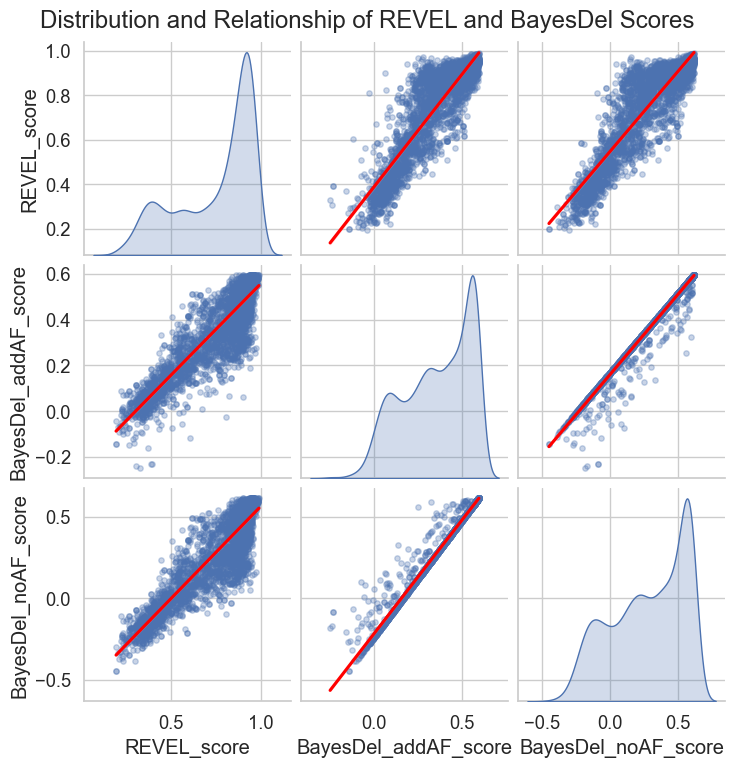

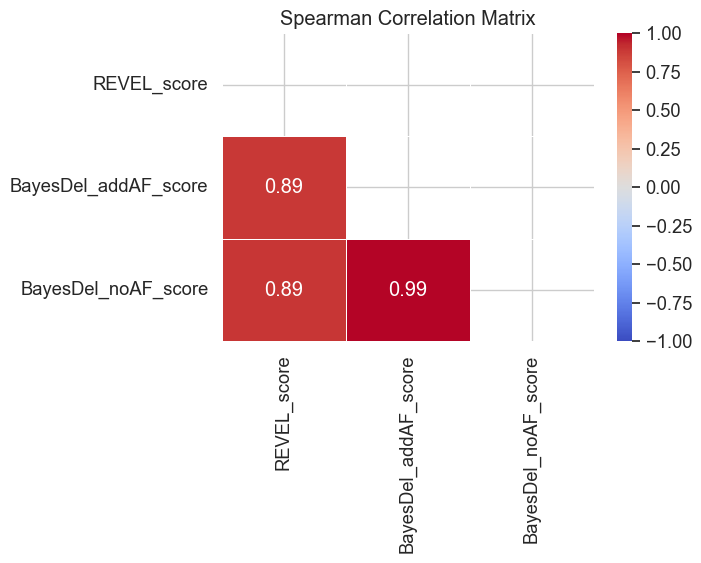

In [54]:
sns.set(style="whitegrid", font_scale=1.2)

# 散点图矩阵Scatter Plot Matrix
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)
g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02) #REVEL与BayesDel评分分布及关系Distribution and Relationship of REVEL and BayesDel Scores
plt.show()

# 相关性热图Correlation Heatmap
corr_matrix = df_clean[["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"]].corr(method="spearman")
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix)),
    fmt=".2f",
    linewidths=0.5
)
plt.title("Spearman Correlation Matrix")
plt.show()

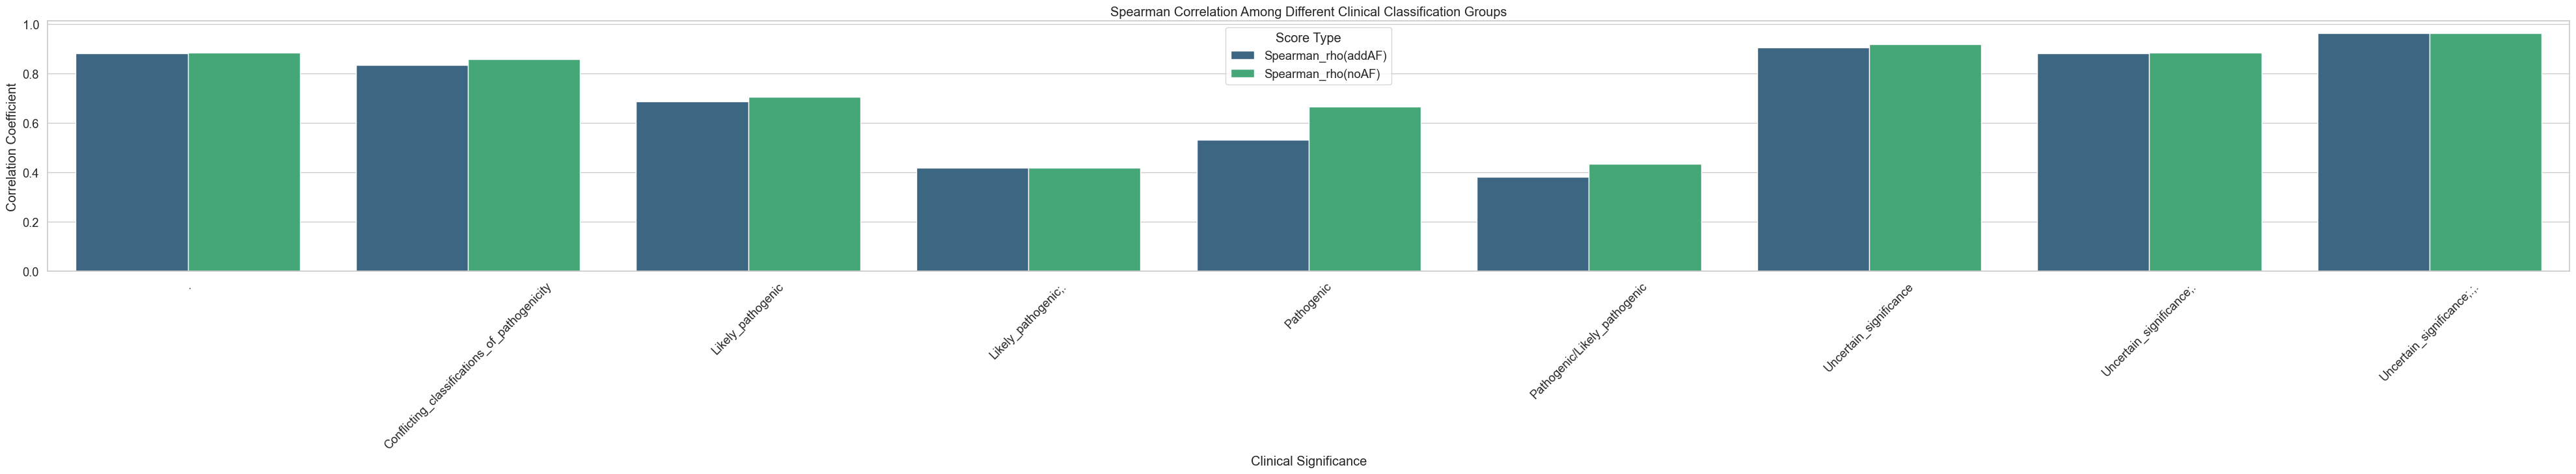

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
if "clinvar_clnsig" in df_clean.columns:
    # 按ClinVar分类分组（保留样本量>10的组）Group by ClinVar classification (retain groups with sample size > 10)
    clinical_groups = df_clean.groupby("clinvar_clnsig")
    significant_groups = [group for name, group in clinical_groups if len(group) > 10]

    # 计算各组相关性Calculate the correlation for each group
    corr_results = []
    for group in significant_groups:
        rho_addAF = group[["REVEL_score", "BayesDel_addAF_score"]].corr(method="spearman").iloc[0,1]
        rho_noAF = group[["REVEL_score", "BayesDel_noAF_score"]].corr(method="spearman").iloc[0,1]
        corr_results.append({
            "Clinical Significance": group["clinvar_clnsig"].iloc[0],
            "Spearman_rho(addAF)": rho_addAF,
            "Spearman_rho(noAF)": rho_noAF,
            "Sample Size": len(group)
        })

    # 可视化Visualization
    if corr_results:
        corr_df = pd.DataFrame(corr_results)
        plt.figure(figsize=(50, 5))
        sns.barplot(
            data=corr_df.melt(id_vars=["Clinical Significance", "Sample Size"]),
            x="Clinical Significance",
            y="value",
            hue="variable",
            palette="viridis"
        )
        plt.title("Spearman Correlation Among Different Clinical Classification Groups")
        plt.ylabel("Correlation Coefficient")
        plt.xticks(rotation=45)
        plt.legend(title="Score Type")

        





        plt.show()
        

C:\Users\DELL\AppData\Local\Temp\ipykernel_30732\2366455653.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_corr = df_clean.groupby("aapos_bin").apply(
C:\Users\DELL\AppData\Local\Temp\ipykernel_30732\2366455653.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pos_corr = df_clean.groupby("aapos_bin").apply(


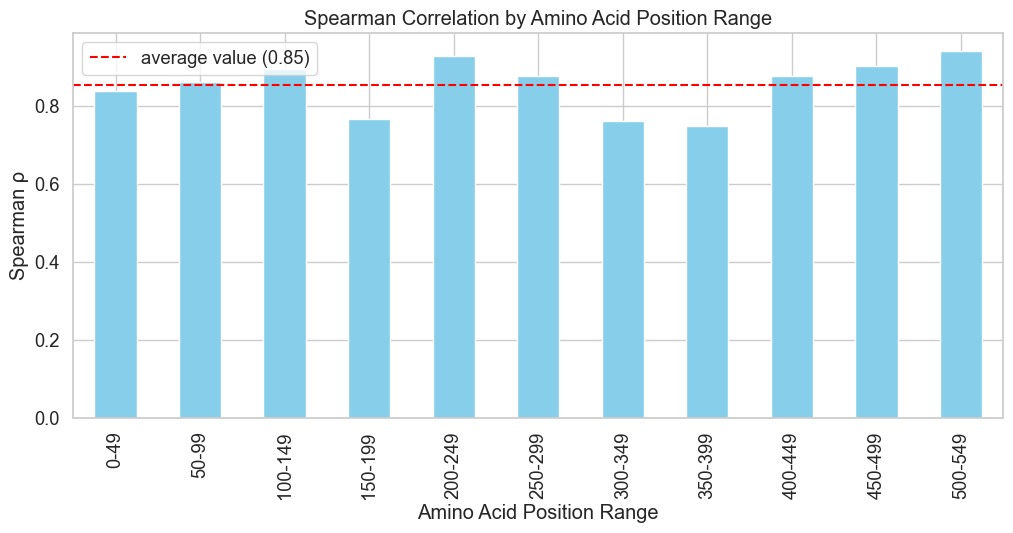

In [ ]:
# 将氨基酸位置分箱（每50个残基为一组）Bin amino acid positions (group every 50 residues)
df_clean["aapos_bin"] = pd.cut(
    df_clean["aapos"],
    bins=range(0, df_clean["aapos"].max()+50, 50),
    right=False,
    labels=[f"{i}-{i+49}" for i in range(0, df_clean["aapos"].max(), 50)]
)

# 计算各分箱相关性Calculate the correlation for each bin
pos_corr = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["REVEL_score", "BayesDel_addAF_score"]].corr(method="spearman").iloc[0,1]
).dropna()

# 可视化Visualization
plt.figure(figsize=(12, 5))
pos_corr.plot(kind="bar", color="skyblue")
plt.axhline(y=pos_corr.mean(), color="red", linestyle="--", label=f"average value ({pos_corr.mean():.2f})")
plt.title("Spearman Correlation by Amino Acid Position Range")
plt.xlabel("Amino Acid Position Range")
plt.ylabel("Spearman ρ")
plt.legend()
plt.show()